In [1]:
import os, re, math
import numpy as np
import pandas as pd

files = [
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Llava7b_Eval/Random/vlat_llava7b_run_01.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Llava7b_Eval/Random/vlat_llava7b_run_02.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Llava7b_Eval/Random/vlat_llava7b_run_03.csv",
]

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    """Two-sided 95% t-critical value (approx)."""
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in files:
    df = pd.read_csv(f)
    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({"Chart_type": df["Chart_type"], "is_correct": is_correct})
        .groupby("Chart_type")["is_correct"]
        .mean()
        .mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby("Chart_type")["accuracy"]
    .agg(
        mean="mean",
        sd=lambda s: s.std(ddof=1),
        n="count"
    )
    .reset_index()
)
summary["se"] = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[["Chart_type","mean","sd","se","ci_lo","ci_hi","n"]].sort_values("Chart_type")
print(summary)
summary.to_csv("llava7b_vlat_accuracy_summary.csv", index=False)

                Chart_type       mean         sd         se      ci_lo  \
0   100% Stacked Bar chart  22.222222  19.245009  11.111111 -25.588889   
1                AreaChart   8.333333  14.433757   8.333333 -27.525000   
2                Bar chart   8.333333  14.433757   8.333333 -27.525000   
3              BubbleChart  38.095238  29.738086  17.169292 -35.784224   
4                Histogram  44.444444  19.245009  11.111111  -3.366667   
5               Line chart  40.000000  20.000000  11.547005  -9.686764   
6                      Map  55.555556  19.245009  11.111111   7.744444   
7                Pie chart  22.222222  19.245009  11.111111 -25.588889   
8              Scatterplot  33.333333   8.247861   4.761905  12.842857   
9        Stacked Bar chart  20.000000  34.641016  20.000000 -66.060000   
10        StackedAreaChart  33.333333  16.666667   9.622504  -8.072303   
11                 Treemap  44.444444  19.245009  11.111111  -3.366667   

         ci_hi  n  
0    70.033333  3

In [2]:
files = [
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Llava13b_Eval/Random/vlat_llava13b_run_01.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Llava13b_Eval/Random/vlat_llava13b_run_02.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Llava13b_Eval/Random/vlat_llava13b_run_03.csv",
]

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    """Two-sided 95% t-critical value (approx)."""
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in files:
    df = pd.read_csv(f)
    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({"Chart_type": df["Chart_type"], "is_correct": is_correct})
        .groupby("Chart_type")["is_correct"]
        .mean()
        .mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby("Chart_type")["accuracy"]
    .agg(
        mean="mean",
        sd=lambda s: s.std(ddof=1),
        n="count"
    )
    .reset_index()
)
summary["se"] = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[["Chart_type","mean","sd","se","ci_lo","ci_hi","n"]].sort_values("Chart_type")
print(summary)
summary.to_csv("llava13b_vlat_accuracy_summary.csv", index=False)

                Chart_type       mean         sd         se      ci_lo  \
0   100% Stacked Bar chart  22.222222  19.245009  11.111111 -25.588889   
1                AreaChart  16.666667  14.433757   8.333333 -19.191667   
2                Bar chart   8.333333  14.433757   8.333333 -27.525000   
3              BubbleChart  28.571429  28.571429  16.495722 -42.409663   
4                Histogram  44.444444  38.490018  22.222222 -51.177778   
5               Line chart  13.333333  11.547005   6.666667 -15.353333   
6                      Map  77.777778  19.245009  11.111111  29.966667   
7                Pie chart  11.111111  19.245009  11.111111 -36.700000   
8              Scatterplot  19.047619   8.247861   4.761905  -1.442857   
9        Stacked Bar chart  20.000000  20.000000  11.547005 -29.686764   
10        StackedAreaChart  33.333333  16.666667   9.622504  -8.072303   
11                 Treemap  44.444444  38.490018  22.222222 -51.177778   

         ci_hi  n  
0    70.033333  3

In [3]:
files = [
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Qwen2.5vl_3b_Eval/Random/vlat_qwen2.5vl_3b_run_01.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Qwen2.5vl_3b_Eval/Random/vlat_qwen2.5vl_3b_run_02.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Qwen2.5vl_3b_Eval/Random/vlat_qwen2.5vl_3b_run_03.csv",
]

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    """Two-sided 95% t-critical value (approx)."""
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in files:
    df = pd.read_csv(f)
    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({"Chart_type": df["Chart_type"], "is_correct": is_correct})
        .groupby("Chart_type")["is_correct"]
        .mean()
        .mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby("Chart_type")["accuracy"]
    .agg(
        mean="mean",
        sd=lambda s: s.std(ddof=1),
        n="count"
    )
    .reset_index()
)
summary["se"] = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[["Chart_type","mean","sd","se","ci_lo","ci_hi","n"]].sort_values("Chart_type")
print(summary)
summary.to_csv("qwen2.5vl_3b_vlat_accuracy_summary.csv", index=False)

                Chart_type       mean         sd        se      ci_lo  \
0   100% Stacked Bar chart  33.333333   0.000000  0.000000  33.333333   
1                AreaChart  25.000000   0.000000  0.000000  25.000000   
2                Bar chart  33.333333  14.433757  8.333333  -2.525000   
3              BubbleChart  85.714286   0.000000  0.000000  85.714286   
4                Histogram  66.666667   0.000000  0.000000  66.666667   
5               Line chart  40.000000   0.000000  0.000000  40.000000   
6                      Map  33.333333   0.000000  0.000000  33.333333   
7                Pie chart   0.000000   0.000000  0.000000   0.000000   
8              Scatterplot  57.142857   0.000000  0.000000  57.142857   
9        Stacked Bar chart  20.000000   0.000000  0.000000  20.000000   
10        StackedAreaChart  38.888889   9.622504  5.555556  14.983333   
11                 Treemap  66.666667   0.000000  0.000000  66.666667   

        ci_hi  n  
0   33.333333  3  
1   25.00000

In [4]:
files = [
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Qwen2.5vl_7b_Eval/Random/vlat_qwen2.5vl_7b_run_01.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Qwen2.5vl_7b_Eval/Random/vlat_qwen2.5vl_7b_run_02.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Qwen2.5vl_7b_Eval/Random/vlat_qwen2.5vl_7b_run_03.csv",
]

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    """Two-sided 95% t-critical value (approx)."""
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in files:
    df = pd.read_csv(f)
    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({"Chart_type": df["Chart_type"], "is_correct": is_correct})
        .groupby("Chart_type")["is_correct"]
        .mean()
        .mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby("Chart_type")["accuracy"]
    .agg(
        mean="mean",
        sd=lambda s: s.std(ddof=1),
        n="count"
    )
    .reset_index()
)
summary["se"] = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[["Chart_type","mean","sd","se","ci_lo","ci_hi","n"]].sort_values("Chart_type")
print(summary)
summary.to_csv("qwen2.5vl_7b_vlat_accuracy_summary.csv", index=False)

                Chart_type        mean   sd   se       ci_lo       ci_hi  n
0   100% Stacked Bar chart   33.333333  0.0  0.0   33.333333   33.333333  3
1                AreaChart    0.000000  0.0  0.0    0.000000    0.000000  3
2                Bar chart    0.000000  0.0  0.0    0.000000    0.000000  3
3              BubbleChart   42.857143  0.0  0.0   42.857143   42.857143  3
4                Histogram   33.333333  0.0  0.0   33.333333   33.333333  3
5               Line chart   20.000000  0.0  0.0   20.000000   20.000000  3
6                      Map   33.333333  0.0  0.0   33.333333   33.333333  3
7                Pie chart   66.666667  0.0  0.0   66.666667   66.666667  3
8              Scatterplot   28.571429  0.0  0.0   28.571429   28.571429  3
9        Stacked Bar chart   20.000000  0.0  0.0   20.000000   20.000000  3
10        StackedAreaChart   66.666667  0.0  0.0   66.666667   66.666667  3
11                 Treemap  100.000000  0.0  0.0  100.000000  100.000000  3


In [5]:
files = [
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Gemma3_12b_Eval/Random/vlat_gemma3_12b_run_01.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Gemma3_12b_Eval/Random/vlat_gemma3_12b_run_02.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Gemma3_12b_Eval/Random/vlat_gemma3_12b_run_03.csv",
]

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    """Two-sided 95% t-critical value (approx)."""
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in files:
    df = pd.read_csv(f)
    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({"Chart_type": df["Chart_type"], "is_correct": is_correct})
        .groupby("Chart_type")["is_correct"]
        .mean()
        .mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby("Chart_type")["accuracy"]
    .agg(
        mean="mean",
        sd=lambda s: s.std(ddof=1),
        n="count"
    )
    .reset_index()
)
summary["se"] = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[["Chart_type","mean","sd","se","ci_lo","ci_hi","n"]].sort_values("Chart_type")
print(summary)
summary.to_csv("gemma3_12b_vlat_accuracy_summary.csv", index=False)

                Chart_type        mean         sd         se       ci_lo  \
0   100% Stacked Bar chart   44.444444  19.245009  11.111111   -3.366667   
1                AreaChart   50.000000   0.000000   0.000000   50.000000   
2                Bar chart   25.000000   0.000000   0.000000   25.000000   
3              BubbleChart   57.142857   0.000000   0.000000   57.142857   
4                Histogram   66.666667   0.000000   0.000000   66.666667   
5               Line chart   66.666667  11.547005   6.666667   37.980000   
6                      Map   33.333333   0.000000   0.000000   33.333333   
7                Pie chart    0.000000   0.000000   0.000000    0.000000   
8              Scatterplot   28.571429   0.000000   0.000000   28.571429   
9        Stacked Bar chart   26.666667  11.547005   6.666667   -2.020000   
10        StackedAreaChart   61.111111   9.622504   5.555556   37.205556   
11                 Treemap  100.000000   0.000000   0.000000  100.000000   

         ci

In [6]:
files = [
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Gemma3_4b_Eval/Random/vlat_gemma3_4b_run_01.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Gemma3_4b_Eval/Random/vlat_gemma3_4b_run_02.csv",
    "C:/Users/Melita/CSE 4001/VLM-Eval-Research/Output/VLAT/Gemma3_4b_Eval/Random/vlat_gemma3_4b_run_03.csv",
]

def run_id(path):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(path), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    """Two-sided 95% t-critical value (approx)."""
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,
             8:2.365,9:2.306,10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    if n > 30: return 1.96
    return table[min(table.keys(), key=lambda k: abs(k-n))]

runs = []
for f in files:
    df = pd.read_csv(f)
    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({"Chart_type": df["Chart_type"], "is_correct": is_correct})
        .groupby("Chart_type")["is_correct"]
        .mean()
        .mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby("Chart_type")["accuracy"]
    .agg(
        mean="mean",
        sd=lambda s: s.std(ddof=1),
        n="count"
    )
    .reset_index()
)
summary["se"] = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[["Chart_type","mean","sd","se","ci_lo","ci_hi","n"]].sort_values("Chart_type")
print(summary)
summary.to_csv("gemma3_4b_vlat_accuracy_summary.csv", index=False)

                Chart_type        mean         sd         se       ci_lo  \
0   100% Stacked Bar chart   33.333333   0.000000   0.000000   33.333333   
1                AreaChart   50.000000   0.000000   0.000000   50.000000   
2                Bar chart   25.000000   0.000000   0.000000   25.000000   
3              BubbleChart   47.619048   8.247861   4.761905   27.128571   
4                Histogram   66.666667   0.000000   0.000000   66.666667   
5               Line chart   40.000000   0.000000   0.000000   40.000000   
6                      Map   22.222222  19.245009  11.111111  -25.588889   
7                Pie chart    0.000000   0.000000   0.000000    0.000000   
8              Scatterplot   42.857143   0.000000   0.000000   42.857143   
9        Stacked Bar chart   40.000000   0.000000   0.000000   40.000000   
10        StackedAreaChart   66.666667   0.000000   0.000000   66.666667   
11                 Treemap  100.000000   0.000000   0.000000  100.000000   

         ci

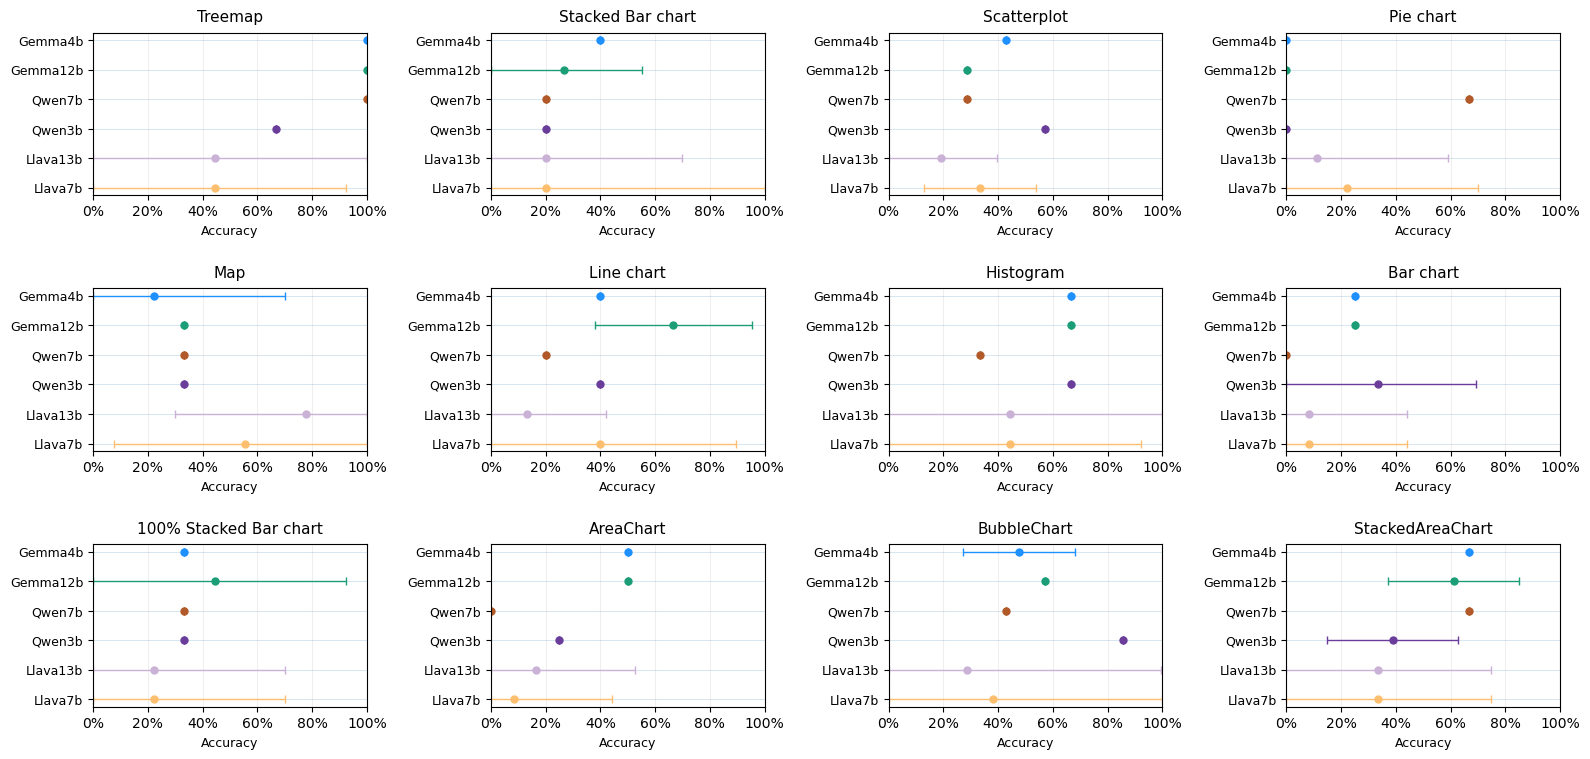

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

MODEL_SUMMARIES = [
    ("Llava7b",  "llava7b_vlat_accuracy_summary.csv"),
    ("Llava13b", "llava13b_vlat_accuracy_summary.csv"),
    ("Qwen3b",   "qwen2.5vl_3b_vlat_accuracy_summary.csv"),
    ("Qwen7b",   "qwen2.5vl_7b_vlat_accuracy_summary.csv"),
    ("Gemma12b", "gemma3_12b_vlat_accuracy_summary.csv"),
    ("Gemma4b",  "gemma3_4b_vlat_accuracy_summary.csv")
]

# 2) Read + combine
frames = []
for model, path in MODEL_SUMMARIES:
    df = pd.read_csv(path)
    if "Model" not in df.columns:
        df["Model"] = model
    frames.append(df[["Chart_type","Model","mean","ci_lo","ci_hi"]])
S = pd.concat(frames, ignore_index=True)

# 3) Appearance / order
MODEL_ORDER = ["Llava7b","Llava13b","Qwen3b","Qwen7b","Gemma12b","Gemma4b"]
MODEL_ORDER = [m for m in MODEL_ORDER if m in S["Model"].unique()]

CHART_ORDER = [
    "Treemap","Stacked Bar chart","Stacked Area Chart","Scatterplot",
    "Pie chart","Map","Line chart","Histogram",
    "Bubble Chart","Bar chart","Area Chart","100% Stacked Bar chart"
]
present = [c for c in CHART_ORDER if c in S["Chart_type"].unique()]
others  = sorted([c for c in S["Chart_type"].unique() if c not in present])
CHARTS  = present + others

# 4) Small-multiples layout
ncols = 4
nrows = int(np.ceil(len(CHARTS)/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 2.7*nrows), sharex=True)
axes = np.array(axes).reshape(-1)

MODEL_COLORS = {
    "Llava7b":  "#fdbf6f",
    "Llava13b": "#cab2d6",
    "Qwen3b":   "#6a3d9a",
    "Qwen7b":   "#b15928",
    "Gemma4b":  "#1E90FF",
    "Gemma12b": "#1b9e77",
}

for ax, chart in zip(axes, CHARTS):
    sub = S[S["Chart_type"] == chart].copy()
    sub = sub.set_index("Model").reindex(MODEL_ORDER).reset_index()

    y = np.arange(len(MODEL_ORDER))
    ax.hlines(y, xmin=0, xmax=100, linewidth=0.5, alpha=0.25)

    for i, row in sub.iterrows():
        if pd.notna(row["mean"]):
            color = MODEL_COLORS.get(row["Model"], "gray")
            # clip CIs to [0,100] just for plotting
            lo = max(0, row["ci_lo"])
            hi = min(100, row["ci_hi"])
            ax.errorbar(
                row["mean"], y[i],
                xerr=[[row["mean"] - lo], [hi - row["mean"]]],
                fmt='o', color=color, ecolor=color,
                capsize=3, elinewidth=1, markersize=5
            )

    ax.set_title(chart, fontsize=11, pad=8)
    ax.set_xlim(0, 100)
    ax.set_yticks(y)
    ax.set_yticklabels(MODEL_ORDER, fontsize=9)

    ax.set_xticks(np.arange(0, 101, 20))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}%"))
    ax.tick_params(axis='x', which='both', labelbottom=True)  # re-enable labels even with sharex
    ax.set_xlabel("Accuracy", fontsize=9)
    ax.grid(axis="x", alpha=0.2)

# fig.suptitle("Model performance across visualization types in VLAT assessment (mean accuracy with 95% CI)", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.95], h_pad=2.0, w_pad=1.5)
plt.savefig("vlat_types_dot_ci_panels.png", dpi=300, bbox_inches="tight")
plt.show()